# Data Report -  Market Cap in Prespective

**From:** Devansh Dalmia
**Email:** dd2277@nyu.edu

**From:** Shawn Yoon
**Email:** hy1232@nyu.edu

This project will measure the increase in market cap of specific companies in their respective industries over the company age within the United States. For instance, comparing two companies like Apple and ExxonMobil, Apple was able to outpace the growth of ExxonMobil to become an industry leader and a relatively young age

The project will use data from Bloomberg to access market cap of the company along with other details like share price, and revenue.

We plan to present 6 graphs with the average market cap of the industry along with the age of each company. A final graph comparing the top performers of each of the industries to compare the market cap with the age. We are using market capitalization to show the size of a company is important because company size is a basic determinant of various characteristics in which investors are interested, including risk.

We use the data to analyse the market cap report for largest company, smallest company and the % weight of them

**Overview:** The data is sourced from Bloomberg. It provides a time scale from 1989 - 2019 for all company information regarding revenue and marekt capitalization. We can also use additional recources from CRSP US Stock Database, CRSP Historical Indexes, and CRSP US Treasury Database for the broadest representation of U.S. Markets

**Access:** I will use the the Bloomberg terminal to download and access the data and create a data set with the relevant metrics. Below I demonstrate that I have the ability to access the data.

Requisite Packages Below I bring in the packages I need...

In [1]:
import pandas as pd # We know this one...
import requests # This is usefull with the API
import numpy as np # For performing numerical analysis
import matplotlib.pyplot as plt # Plotting
import weightedcalcs as wc # This allows for "weighted" calculations
import os
import requests, io
import zipfile as zf
import shutil
import datetime

In [2]:
ticker = pd.DataFrame([["Tech", "Apple", "AAPL"], ["Tech", "Amazon", "AMZN"], ["Tech", "Google", "GOOGL"],
                  ["Energy", "ExxonMobil", "XOM"], ["Energy", "Chevron", "CVX"],["Energy", "ChonocoPhillips", "COP"], 
                  ["Motor Vehicles and Parts", "General Motors", "GM"], ["Motor Vehicles and Parts", "FORD", "FORD"], ["Motor Vehicles and Parts", "Goodyear Tire & Rubber", "GT"],
                  ["Health", "CVS", "CVS"], ["Health", "Pfizer", "PFE"], ["Health", "Merk", "MRK"],
                  ["Industrials", "General Electrics", "GE"], ["Industrials", "Honeywell International", "HON"], ["Industrials", "3M", "MMM"],
                  ["Food & Beverages", "Pepsi", "PEP"], ["Food & Beverages", "Archer Daniels Midland", "ADM"], ["Food & Beverages", "Coca-Cola", "KO"]],
                  columns = ["Sector", "Company", "Ticker"])

ticker = ticker.set_index(["Sector", "Company", "Ticker"])

### These are the list of tickers that corresponds to the companies. 

In [3]:
ticker

Empty DataFrame
Columns: []
Index: [(Tech, Apple, AAPL), (Tech, Amazon, AMZN), (Tech, Google, GOOGL), (Energy, ExxonMobil, XOM), (Energy, Chevron, CVX), (Energy, ChonocoPhillips, COP), (Motor Vehicles and Parts, General Motors, GM), (Motor Vehicles and Parts, FORD, FORD), (Motor Vehicles and Parts, Goodyear Tire & Rubber, GT), (Health, CVS, CVS), (Health, Pfizer, PFE), (Health, Merk, MRK), (Industrials, General Electrics, GE), (Industrials, Honeywell International, HON), (Industrials, 3M, MMM), (Food & Beverages, Pepsi, PEP), (Food & Beverages, Archer Daniels Midland, ADM), (Food & Beverages, Coca-Cola, KO)]

**Grabbing the Data :**  

Get the data from here: 
[Click Here](https://app.box.com/s/x062b29bjvwlwrta2rgromgna7p4gmmw)

Once you have downloaded the zip file of the dataset, relocate the zipfile onto the current working directory.

In [4]:
cwd = os.getcwd()
zipfile = "\\final_project_data_set.zip"
path = cwd + zipfile

In [5]:
data_set = zf.ZipFile(path)

These are the csv files that has the data of revenue and market capital for each company. 

In [6]:
data_set.namelist()

['3M.csv',
 'Amazon.csv',
 'Apple.csv',
 'Archer_Daniels_Midland.csv',
 'Chevron.csv',
 'ChonocoPhillips.csv',
 'Coca_Cola.csv',
 'CVS.csv',
 'ExxonMobil.csv',
 'FORD.csv',
 'General_Electrics.csv',
 'General_Motors.csv',
 'Goodyear_Tire&Rubber.csv',
 'Google.csv',
 'Honeywell_International.csv',
 'Merk.csv',
 'Pepsi.csv',
 'Pfizer.csv']

Here is an example of the data

In [7]:
example_df = pd.read_csv(data_set.open(data_set.namelist()[0]))

In [8]:
example_df.head()

,Date,MMM US Equity - Revenue (R1),MMM US Equity - Current Market Cap (L1)
0,2019-03-29,NaN,1.196600e+11
1,2018-12-31,7945.0,1.109490e+11
2,2018-09-30,8152.0,1.236050e+11
3,2018-06-30,8390.0,1.167910e+11
4,2018-03-31,8278.0,1.305500e+11


The data looks pretty raw. What I am going to do is to create a column with the ticker and sector for each company. This will allow us to merge all these separate data with neat classification in the futuere.   

This is a function that creates a new directory in the current working directory. 

The source: https://gist.github.com/keithweaver/562d3caa8650eefe7f84fa074e9ca949

In [9]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

We are going to create a new directory that is called "New_Data_Set", and export the data files with the columns of ticker and sector to this new directory.

In [10]:
createFolder("New_Data_Set")

This for loop is going to create new csv files with the column of tickers and sectors and export them to the new directory, "New_Data_Set" that we just created.

In [11]:
company_sector = {"Apple":"Tech", "Amazon":"Tech", "Google":"Tech", 
                  "ExxonMobil":"Energy", "Chevron":"Energy", "ChonocoPhillips":"Energy", 
                  "General_Motors":"Motor Vehicles and Parts", "FORD":"Motor Vehicles and Parts", "Goodyear_Tire&Rubber":"Motor Vehicles and Parts", 
                  "CVS":"Health", "Pfizer":"Health", "Merk":"Health", 
                  "General_Electrics":"Industrials", "Honeywell_International":"Industrials", "3M":"Industrials", 
                  "Pepsi":"Food & Beverages", "Archer_Daniels_Midland":"Food & Beverages", "Coca_Cola":"Food & Beverages"}

file_list = data_set.namelist()

for var in file_list:
    df = pd.DataFrame(pd.read_csv(data_set.open(var)))
    df["Company"] = df.columns[1].split(maxsplit=1)[0]
    
    for key in company_sector.keys():
        if var == key+".csv":
            df["Sector"] = company_sector.get(key)
    
    
    df.to_csv(cwd + "\\New_Data_Set\\" + var, index = None)

We have created new csv files in the "New_Data_Set" directory. Now we are going to read in these files and turn them into one large dataframe. 

In [12]:
path = cwd + "\\New_Data_Set"
new_file_list = os.listdir(path)

In [13]:
final_df = pd.DataFrame()

for file in new_file_list:
    indv_df = pd.DataFrame(pd.read_csv(path+"\\"+file))
    indv_df.rename(columns = {indv_df.columns[1]:"Revenue"}, inplace=True)
    indv_df.rename(columns = {indv_df.columns[2]:"Market Cap"}, inplace=True)
    
    final_df = final_df.append(indv_df)

In [14]:
final_df.shape

(2064, 5)

In [15]:
final_df

,Date,Revenue,Market Cap,Company,Sector
0,2019-03-29,NaN,1.196600e+11,MMM,Industrials
1,2018-12-31,7945.0000,1.109490e+11,MMM,Industrials
2,2018-09-30,8152.0000,1.236050e+11,MMM,Industrials
3,2018-06-30,8390.0000,1.167910e+11,MMM,Industrials
4,2018-03-31,8278.0000,1.305500e+11,MMM,Industrials
5,2017-12-31,7990.0000,1.401880e+11,MMM,Industrials
6,2017-09-30,8172.0000,1.252610e+11,MMM,Industrials
7,2017-06-30,7810.0000,1.243390e+11,MMM,Industrials
8,2017-03-31,7685.0000,1.143380e+11,MMM,Industrials
9,2016-12-31,7329.0000,1.074040e+11,MMM,Industrials


### Making the Dataframe Pretty 

* We have 2064 rows and 4 columns. This dataframe still looks pretty raw. 
* We are going to clean up some NaN values, set the Date column as an index, change it to datetime.
* We will also apply groupby function, so that the companies are grouped by sectors.  
* These will allow us to arrange dataframe the way we want. 

In [16]:
final_df.set_index(keys = "Date", inplace=True)
final_df = final_df.dropna()
final_df.index = pd.to_datetime(final_df.index, yearfirst = True)
groupby_df = final_df.groupby(["Sector", "Company", "Date"]).sum()
final_df.shape

(1825, 4)

The dataframe looks pretty good now.

In [17]:
groupby_df

Revenue    Market Cap
Sector Company Date                             
Energy COP     1989-12-31   3030.0  6.142138e+09
               1990-03-31   3116.0  6.341270e+09
               1990-06-30   2859.0  6.281816e+09
               1990-09-30   3306.0  6.310733e+09
               1990-12-31   4322.0  6.407731e+09
               1991-03-31   3285.0  7.276500e+09
               1991-06-30   3150.0  6.597360e+09
               1991-09-30   2970.0  6.814290e+09
               1991-12-31   3199.0  6.232632e+09
               1992-03-31   2712.0  6.039908e+09
               1992-06-30   3042.0  6.299689e+09
               1992-09-30   3098.0  7.146865e+09
               1992-12-31   3081.0  6.529635e+09
               1993-03-31   3029.0  7.318996e+09
               1993-06-30   3230.0  7.293888e+09
               1993-09-30   3170.0  8.813476e+09
               1993-12-31   2880.0  7.580311e+09
               1994-03-31   2884.0  6.961905e+09
               1994-06-30   2995.0  8.166968e+09
               1994-09-30   3315.0  8.958533e+09
               1994-12-31   3017.0  8.564354e+09
               1995-03-31   3087.0  9.582492e+09
               1995-06-30   3591.0  8.736641e+09
               1995-09-30   3369.0  8.520005e+09
               1995-12-31   3321.0  8.943070e+09
               1996-03-31   3595.0  1.032589e+10
               1996-06-30   3937.0  1.100940e+10
               1996-09-30   3852.0  1.125000e+10
               1996-12-31   4347.0  1.164585e+10
               1997-03-31   3944.0  1.075495e+10
...                            ...           ...
Tech   GOOGL   2011-09-30   9720.0  1.667060e+11
               2011-12-31  10584.0  2.091990e+11
               2012-03-31  10645.0  2.089460e+11
               2012-06-30  11807.0  1.891070e+11
               2012-09-30  13304.0  2.474900e+11
               2012-12-31  14419.0  2.324410e+11
               2013-03-31  12951.0  2.629850e+11
               2013-06-30  13107.0  2.920770e+11
               2013-09-30  13754.0  2.918710e+11
               2013-12-31  15707.0  3.744150e+11
               2014-03-31  15420.0  3.751940e+11
               2014-06-30  15955.0  3.909290e+11
               2014-09-30  16523.0  3.939560e+11
               2014-12-31  18103.0  3.584200e+11
               2015-03-31  17258.0  3.750810e+11
               2015-06-30  17727.0  3.613430e+11
               2015-09-30  18675.0  4.265500e+11
               2015-12-31  21329.0  5.279610e+11
               2016-03-31  20257.0  5.177380e+11
               2016-06-30  21500.0  4.788040e+11
               2016-09-30  22451.0  5.427580e+11
               2016-12-31  26064.0  5.385720e+11
               2017-03-31  24750.0  5.794260e+11
               2017-06-30  26010.0  6.353420e+11
               2017-09-30  27772.0  6.692460e+11
               2017-12-31  32323.0  7.292940e+11
               2018-03-31  31146.0  7.191240e+11
               2018-06-30  32657.0  7.792350e+11
               2018-09-30  33740.0  8.346580e+11
               2018-12-31  39276.0  7.232460e+11

[1825 rows x 2 columns]

But we can do better with the dataframe. The function below will do the followings: 

* Because the data has quaterly data, we want to resample it yearly. The function below takes in specific sector and company and turn revenue and market cap into yearly data. 
* It also creates new column, "Year". This will help us to plot later. 
* Also, as you can see above, the Market Cap column is in scientific notaion. The function will change it to inegers.
* After converting scientific notation into integers, we are going to change number to millions in order to match up with the Revenue column units. 

In [18]:
def create_company_df(Sector, Company):
    
    groupby_cp = groupby_df.loc[Sector].loc[Company].resample('y').mean()
    groupby_cp['Year'] = pd.DatetimeIndex(groupby_cp.index).year
    groupby_cp = groupby_cp[["Year", "Market Cap", "Revenue"]]
    groupby_cp["Market Cap"] = groupby_cp["Market Cap"]/1000000
    
    groupby_cp['Market Cap'] = groupby_cp['Market Cap'].astype('int64')
    groupby_cp['Revenue'] = groupby_cp['Revenue'].astype('int64')
    
    return groupby_cp

* Because we have 6 different sectors and 3 companies for each sector, we are going to use a nested for loop to apply the "groupby_companies()" function.
* Through this nested for loop, we will be able to turn this big dataframe into individual dataframes by companies. 

In [19]:
company_list = [['XOM', 'CVX', 'COP'], ['AAPL', 'AMZN', 'GOOGL'], 
                ['GM', 'FORD', 'GT'], ['CVS', 'PFE', 'MRK'], 
                ['GE', 'HON', 'MMM'], ['PEP', 'ADM', 'KO']]

sector_list = ["Energy", "Tech", "Motor Vehicles and Parts", 
               "Health", "Industrials", "Food & Beverages"]

for count in range(6):
    
    subcount = 0
    for comps in company_list[count]:
        company = create_company_df(sector_list[count], comps) 

        #### Assigning names for energy sector companies ####
        if comps == "XOM":
            XOM = company
        elif comps == "CVX":
            CVX = company
        elif comps == "COP": 
            COP = company

        #### Assigning names for tech sector companies ####  
        elif comps == "AAPL":
            AAPL = company
        elif comps == "AMZN":
            AMZN = company
        elif comps == "GOOGL": 
            GOOGL = company
        
        #### Assigning names for Motor Vehicles sector companies ####
        elif comps == "GM":
            GM = company
        elif comps == "FORD":
            FORD = company
        elif comps == "GT": 
            GT = company
  
        #### Assigning names for Health sector companies ####    
        elif comps == "CVS":
            CVS = company
        elif comps == "PFE":
            PFE = company
        elif comps == "MRK": 
            MRK = company

        #### Assigning names for Industrials sector companies ####    
        elif comps == "GE":
            GE = company
        elif comps == "HON":
            HON = company
        elif comps == "MMM": 
            MMM = company

        #### Assigning names for Food & Beverages sector companies ####    
        elif comps == "PEP":
            PEP = company
        elif comps == "ADM":
            ADM = company
        else: 
            KO = company
            
        subcount = subcount + 1 
        
        if subcount == 3:
            subcount = 0  
            pass

We have assigned tickers for variable names. So, for example, if we want to see the yearly revenue and market cap for **General Electrics** we can simply type the ticker of General Electrics, **GE**. 

In [20]:
GE

,Year,Market Cap,Revenue
Date,,,
1990-12-31,1990,54700,14415
1991-12-31,1991,63092,14844
1992-12-31,1992,68010,14068
1993-12-31,1993,82333,13774
1994-12-31,1994,82506,13942
1995-12-31,1995,103782,17319
1996-12-31,1996,146704,19635
1997-12-31,1997,209492,22135
1998-12-31,1998,292404,24955


### Now, let's plot this

### Energy Sector

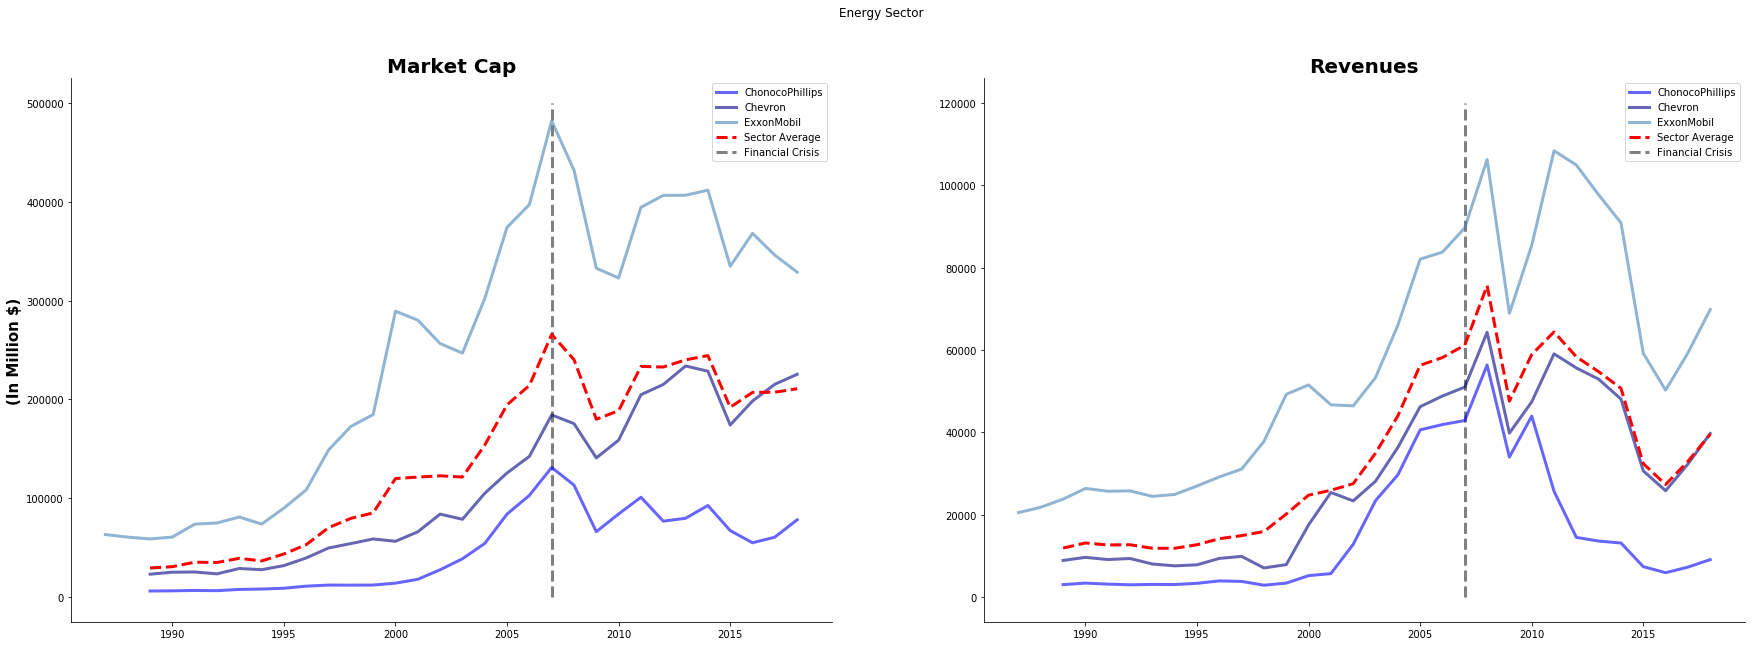

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(30,10))
ax = axes

fig.suptitle("Energy Sector", fontdict = {'fontsize':40, 'fontweight':'bold'})

########## Energy Sector Plot ###########

mrk_avg = (XOM["Market Cap"]+CVX["Market Cap"]+COP["Market Cap"])/3

ax[0].plot(COP.Year, COP["Market Cap"], color = "blue", alpha = 0.6, linewidth = 3, label = "ChonocoPhillips")
ax[0].plot(CVX.Year, CVX["Market Cap"], color = "navy", alpha = 0.6, linewidth = 3, label = "Chevron")
ax[0].plot(XOM.Year, XOM["Market Cap"], color = "steelblue", alpha = 0.6, linewidth = 3, label = "ExxonMobil")
ax[0].plot(XOM.Year, mrk_avg, color = "red", linestyle = "--", alpha = 1, linewidth = 3, label = "Sector Average")

ax[0].ticklabel_format(useOffset=False, style='plain')

ax[0].vlines(x = 2007, ymin = 0, ymax = 500000, colors = 'gray', linestyles = 'dashed', label = "Financial Crisis", linewidth = 3)

ax[0].legend(frameon = True)

ax[0].set_title(label = "Market Cap", fontdict = {'fontsize':20, 'fontweight':'bold'})
ax[0].set_ylabel(ylabel = "(In Million $)", fontdict = {'fontsize':15, 'fontweight':'bold'})

ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)

#########################################################################################################

rev_avg = (XOM["Revenue"]+CVX["Revenue"]+COP["Revenue"])/3

ax[1].plot(COP.Year, COP["Revenue"], color = "blue", alpha = 0.6, linewidth = 3, label = "ChonocoPhillips")
ax[1].plot(CVX.Year, CVX["Revenue"], color = "navy", alpha = 0.6, linewidth = 3, label = "Chevron")
ax[1].plot(XOM.Year, XOM["Revenue"], color = "steelblue", alpha = 0.6, linewidth = 3, label = "ExxonMobil")
ax[1].plot(XOM.Year, rev_avg, color = "red", linestyle = "--", alpha = 1, linewidth = 3, label = "Sector Average")

ax[1].ticklabel_format(useOffset=False, style='plain')

ax[1].vlines(x = 2007, ymin = 0, ymax = 120000, colors = 'gray', linestyles = 'dashed', label = "Financial Crisis", linewidth = 3)

ax[1].legend(frameon = True)

ax[1].set_title(label = "Revenues", fontdict = {'fontsize':20, 'fontweight':'bold'})

ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)

plt.savefig("energy_sector.png", bbox_inches = "tight", dip = 1200)

plt.show()

* The energy sector is plotted nicely. The effect of the Financial Crisis that broke out in 2007 is clearly shown on the market cap of the energy sector. 
* And of course, the revenue was affected little after the year 2007. That's probably because the revenue is reported annually. 

### Tech Sector

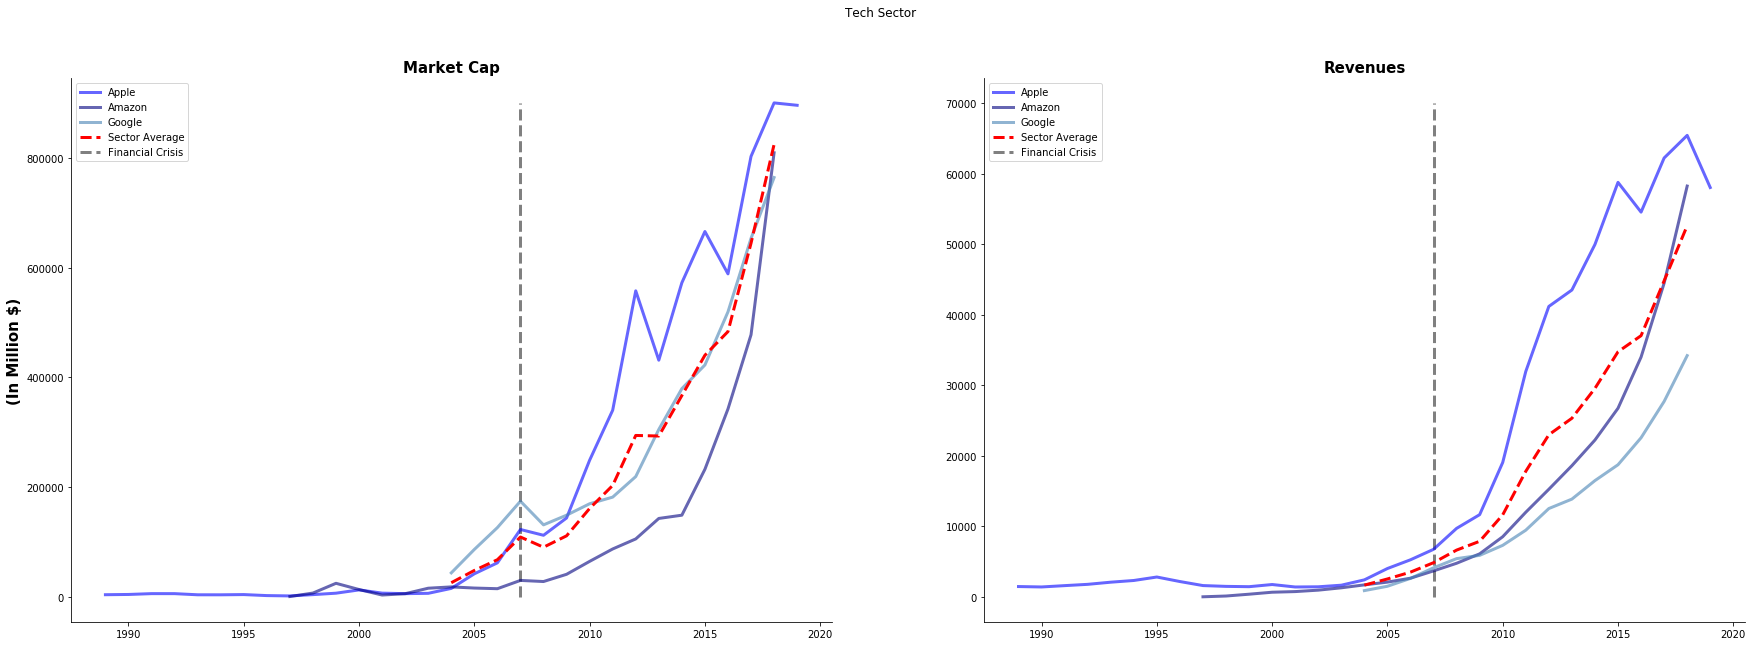

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(30,10))
ax = axes

fig.suptitle("Tech Sector", fontdict = {'fontsize':30, 'fontweight':'bold'})


########## Tech Sector Plot ###########

mrk_avg = (AAPL["Market Cap"]+AMZN["Market Cap"]+GOOGL["Market Cap"])/3

ax[0].plot(AAPL.Year, AAPL["Market Cap"], color = "blue", alpha = 0.6, linewidth = 3, label = "Apple")
ax[0].plot(AMZN.Year, AMZN["Market Cap"], color = "navy", alpha = 0.6, linewidth = 3, label = "Amazon")
ax[0].plot(GOOGL.Year, GOOGL["Market Cap"], color = "steelblue", alpha = 0.6, linewidth = 3, label = "Google")
ax[0].plot(AAPL.Year, mrk_avg, color = "red", linestyle = "--", alpha = 1, linewidth = 3, label = "Sector Average")
ax[0].ticklabel_format(useOffset=False, style='plain')

ax[0].vlines(x = 2007, ymin = 0, ymax = 900000, colors = 'gray', linestyles = 'dashed', label = "Financial Crisis", linewidth = 3)

ax[0].legend(frameon = True)

ax[0].set_title(label = "Market Cap", fontdict = {'fontsize':15, 'fontweight':'bold'})
ax[0].set_ylabel(ylabel = "(In Million $)", fontdict = {'fontsize':15, 'fontweight':'bold'})

ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)


#########################################################################################################

rev_avg = (AAPL["Revenue"]+AMZN["Revenue"]+GOOGL["Revenue"])/3

ax[1].plot(AAPL.Year, AAPL["Revenue"], color = "blue", alpha = 0.6, linewidth = 3, label = "Apple")
ax[1].plot(AMZN.Year, AMZN["Revenue"], color = "navy", alpha = 0.6, linewidth = 3, label = "Amazon")
ax[1].plot(GOOGL.Year, GOOGL["Revenue"], color = "steelblue", alpha = 0.6, linewidth = 3, label = "Google")
ax[1].plot(AAPL.Year, rev_avg, color = "red", linestyle = "--", alpha = 1, linewidth = 3, label = "Sector Average")

ax[1].ticklabel_format(useOffset=False, style='plain')

ax[1].vlines(x = 2007, ymin = 0, ymax = 70000, colors = 'gray', linestyles = 'dashed', label = "Financial Crisis", linewidth = 3)

ax[1].legend(frameon = True)

ax[1].set_title(label = "Revenues", fontdict = {'fontsize':15, 'fontweight':'bold'})

ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)

plt.savefig("tech_sector.png", bbox_inches = "tight", dip = 1200)

plt.show()

* The tech sector is also interesting. Both the market cap and the revenue were not really affected by the financial crisis.
* And the sector picked up the momentum of rapid growth on year 2010.  

### Motor Vehicles and Parts

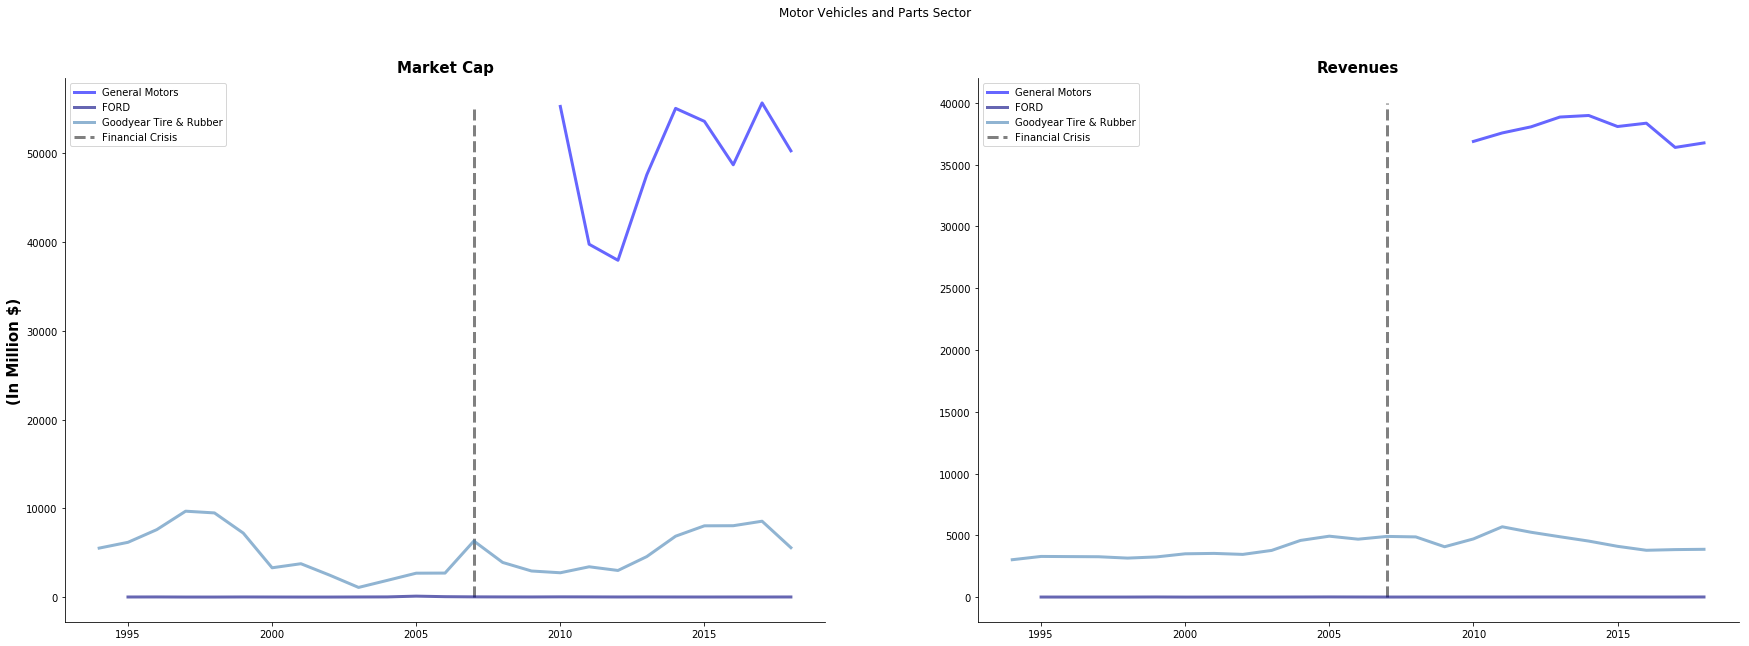

In [23]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(30,10))
ax = axes

fig.suptitle("Motor Vehicles and Parts Sector", fontdict = {'fontsize':30, 'fontweight':'bold'})


########## Motor Vehicles and Parts Sector Plot ###########

ax[0].plot(GM.Year, GM["Market Cap"], color = "blue", alpha = 0.6, linewidth = 3, label = "General Motors")
ax[0].plot(FORD.Year, FORD["Market Cap"], color = "navy", alpha = 0.6, linewidth = 3, label = "FORD")
ax[0].plot(GT.Year, GT["Market Cap"], color = "steelblue", alpha = 0.6, linewidth = 3, label = "Goodyear Tire & Rubber")
ax[0].ticklabel_format(useOffset=False, style='plain')

ax[0].vlines(x = 2007, ymin = 0, ymax = 55000, colors = 'gray', linestyles = 'dashed', label = "Financial Crisis", linewidth = 3)

ax[0].legend(frameon = True)

ax[0].set_title(label = "Market Cap", fontdict = {'fontsize':15, 'fontweight':'bold'})
ax[0].set_ylabel(ylabel = "(In Million $)", fontdict = {'fontsize':15, 'fontweight':'bold'})

ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)


############################################################################


ax[1].plot(GM.Year, GM["Revenue"], color = "blue", alpha = 0.6, linewidth = 3, label = "General Motors")
ax[1].plot(FORD.Year, FORD["Revenue"], color = "navy", alpha = 0.6, linewidth = 3, label = "FORD")
ax[1].plot(GT.Year, GT["Revenue"], color = "steelblue", alpha = 0.6, linewidth = 3, label = "Goodyear Tire & Rubber")
ax[1].ticklabel_format(useOffset=False, style='plain')

ax[1].vlines(x = 2007, ymin = 0, ymax = 40000, colors = 'gray', linestyles = 'dashed', label = "Financial Crisis", linewidth = 3)

ax[1].legend(frameon = True)

ax[1].set_title(label = "Revenues", fontdict = {'fontsize':15, 'fontweight':'bold'})

ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)

plt.savefig("motor_sector.png", bbox_inches = "tight", dip = 1200)

plt.show()

* The motor vehicles sector was not plotted the way we expected. 
* This odd looking shape of the plot is due to the lack of available historical data and variance in individual observations. 

### Health Sector

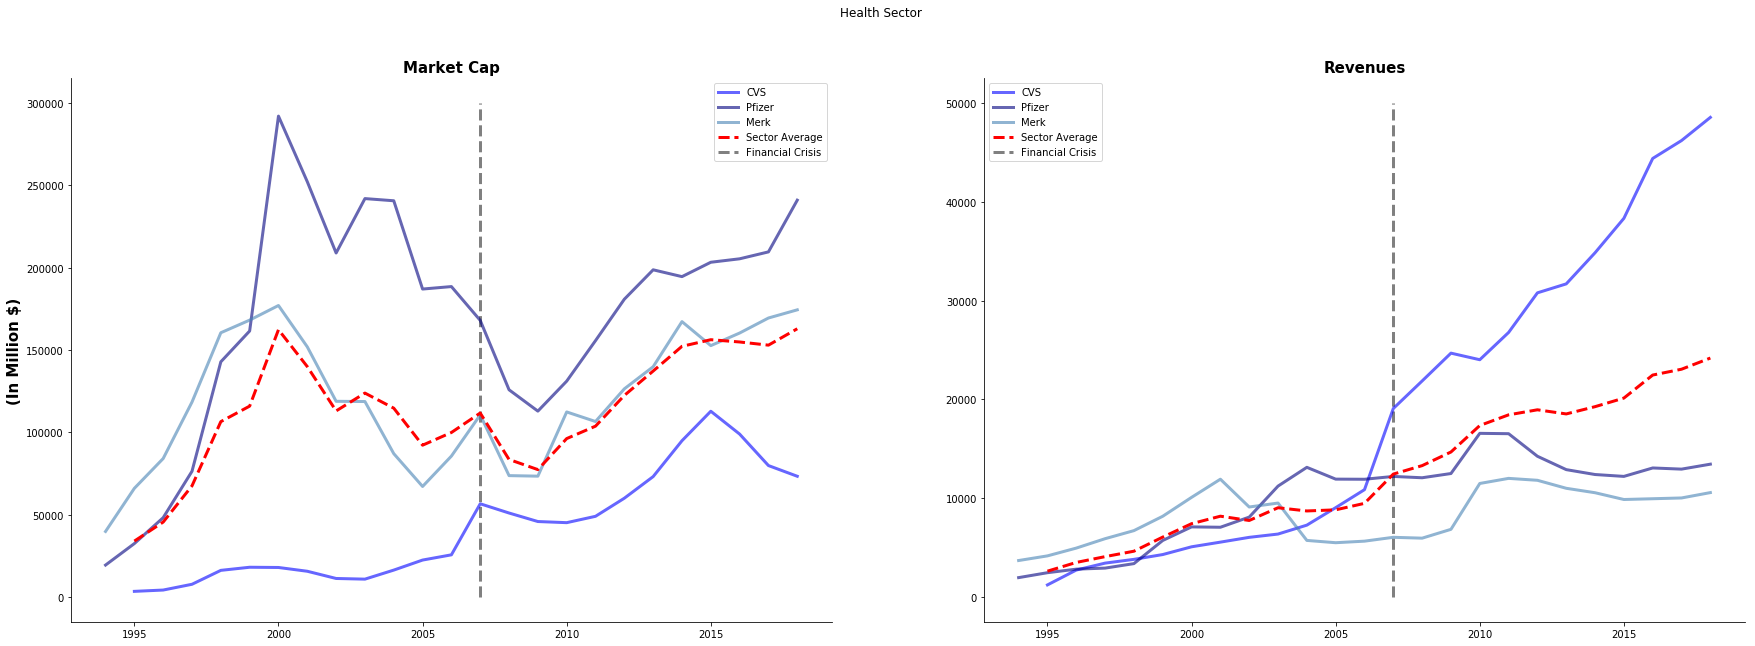

In [24]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(30,10))
ax = axes

fig.suptitle("Health Sector", fontdict = {'fontsize':30, 'fontweight':'bold'})


########## Health Sector Plot ###########

mrk_avg = (CVS["Market Cap"]+PFE["Market Cap"]+MRK["Market Cap"])/3

ax[0].plot(CVS.Year, CVS["Market Cap"], color = "blue", alpha = 0.6, linewidth = 3, label = "CVS")
ax[0].plot(PFE.Year, PFE["Market Cap"], color = "navy", alpha = 0.6, linewidth = 3, label = "Pfizer")
ax[0].plot(MRK.Year, MRK["Market Cap"], color = "steelblue", alpha = 0.6, linewidth = 3, label = "Merk")
ax[0].plot(PFE.Year, mrk_avg, color = "red", linestyle = "--", alpha = 1, linewidth = 3, label = "Sector Average")

ax[0].ticklabel_format(useOffset=False, style='plain')

ax[0].vlines(x = 2007, ymin = 0, ymax = 300000, colors = 'gray', linestyles = 'dashed', label = "Financial Crisis", linewidth = 3)

ax[0].legend(frameon = True)

ax[0].set_title(label = "Market Cap", fontdict = {'fontsize':15, 'fontweight':'bold'})
ax[0].set_ylabel(ylabel = "(In Million $)", fontdict = {'fontsize':15, 'fontweight':'bold'})

ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)

##################################################################

rev_avg = (CVS["Revenue"]+PFE["Revenue"]+MRK["Revenue"])/3

ax[1].plot(CVS.Year, CVS["Revenue"], color = "blue", alpha = 0.6, linewidth = 3, label = "CVS")
ax[1].plot(PFE.Year, PFE["Revenue"], color = "navy", alpha = 0.6, linewidth = 3, label = "Pfizer")
ax[1].plot(MRK.Year, MRK["Revenue"], color = "steelblue", alpha = 0.6, linewidth = 3, label = "Merk")
ax[1].plot(PFE.Year, rev_avg, color = "red", linestyle = "--", alpha = 1, linewidth = 3, label = "Sector Average")
ax[1].ticklabel_format(useOffset=False, style='plain')

ax[1].vlines(x = 2007, ymin = 0, ymax = 50000, colors = 'gray', linestyles = 'dashed', label = "Financial Crisis", linewidth = 3)

ax[1].legend(frameon = True)

ax[1].set_title(label = "Revenues", fontdict = {'fontsize':15, 'fontweight':'bold'})

ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)

plt.savefig("health_sector.png", bbox_inches = "tight", dip = 1200)

plt.show()

* The plot of the health sector has some interesting shape. 
* Even though, CVS outpaced its competitors in revenue, it's market cap is remarkably lower than the others. 
* From this analysis, it would be worthwhile to take a look at CVS's profit margin, number of outstanding shares, and growth potential. 
* If none of these factors are negatively affecting CVS's market cap, then we may assume that CVS's stock price is seriously undervalued. 

### Industrial Sector

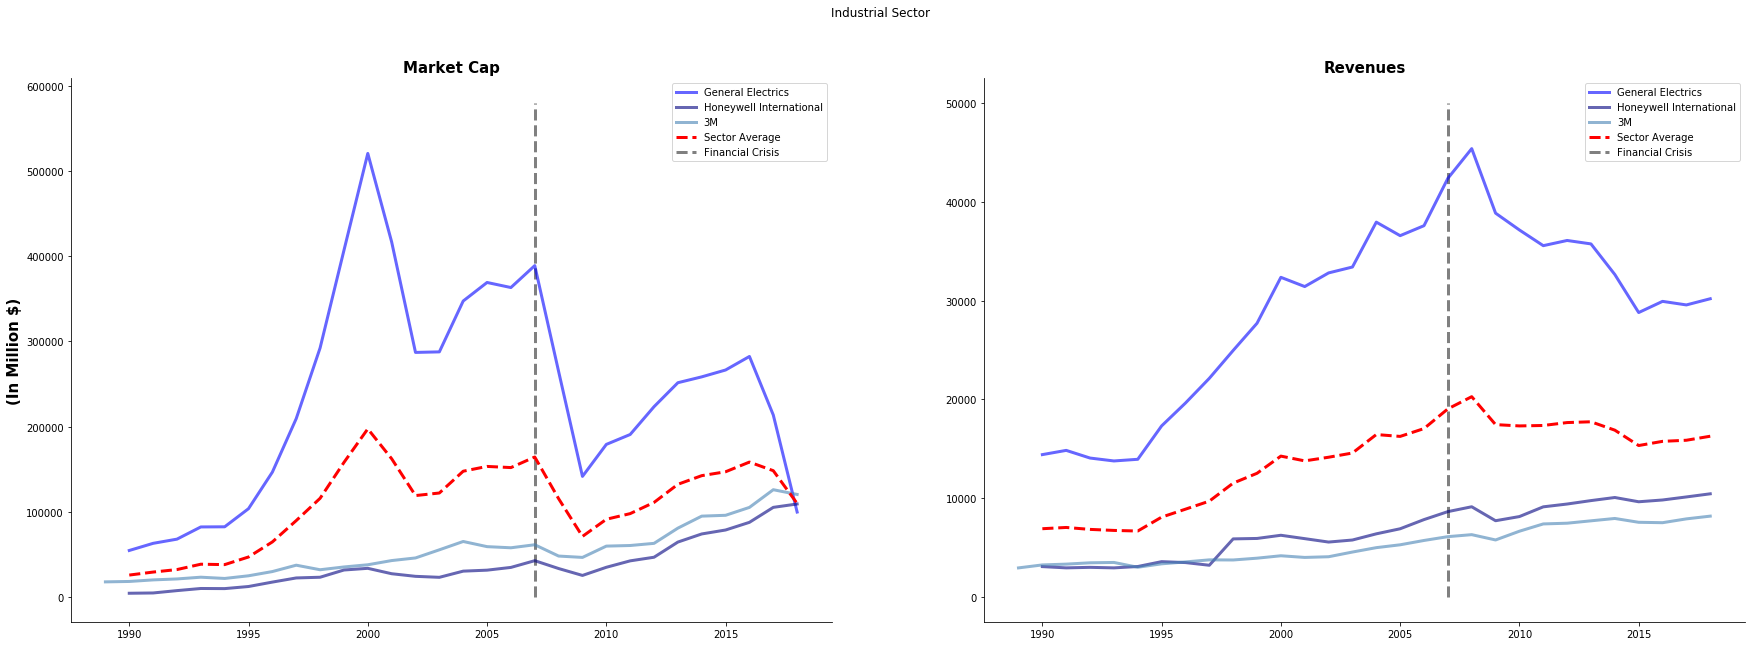

In [25]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(30,10))
ax = axes

fig.suptitle("Industrial Sector", fontdict = {'fontsize':30, 'fontweight':'bold'})


########## Industrial Sector Plot ###########

mrk_avg = (GE["Market Cap"]+HON["Market Cap"]+MMM["Market Cap"])/3

ax[0].plot(GE.Year, GE["Market Cap"], color = "blue", alpha = 0.6, linewidth = 3, label = "General Electrics")
ax[0].plot(HON.Year, HON["Market Cap"], color = "navy", alpha = 0.6, linewidth = 3, label = "Honeywell International")
ax[0].plot(MMM.Year, MMM["Market Cap"], color = "steelblue", alpha = 0.6, linewidth = 3, label = "3M")
ax[0].plot(MMM.Year, mrk_avg, color = "red", linestyle = "--", alpha = 1, linewidth = 3, label = "Sector Average")
ax[0].ticklabel_format(useOffset=False, style='plain')

ax[0].vlines(x = 2007, ymin = 0, ymax = 580000, colors = 'gray', linestyles = 'dashed', label = "Financial Crisis", linewidth = 3)

ax[0].legend(frameon = True)

ax[0].set_title(label = "Market Cap", fontdict = {'fontsize':15, 'fontweight':'bold'})
ax[0].set_ylabel(ylabel = "(In Million $)", fontdict = {'fontsize':15, 'fontweight':'bold'})

ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)

##################################################################

rev_avg = (GE["Revenue"]+HON["Revenue"]+MMM["Revenue"])/3

ax[1].plot(GE.Year, GE["Revenue"], color = "blue", alpha = 0.6, linewidth = 3, label = "General Electrics")
ax[1].plot(HON.Year, HON["Revenue"], color = "navy", alpha = 0.6, linewidth = 3, label = "Honeywell International")
ax[1].plot(MMM.Year, MMM["Revenue"], color = "steelblue", alpha = 0.6, linewidth = 3, label = "3M")
ax[1].plot(MMM.Year, rev_avg, color = "red", linestyle = "--", alpha = 1, linewidth = 3, label = "Sector Average")
ax[1].ticklabel_format(useOffset=False, style='plain')

ax[1].vlines(x = 2007, ymin = 0, ymax = 50000, colors = 'gray', linestyles = 'dashed', label = "Financial Crisis", linewidth = 3)

ax[1].legend(frameon = True)

ax[1].set_title(label = "Revenues", fontdict = {'fontsize':15, 'fontweight':'bold'})

ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)

plt.savefig("industrial_sector.png", bbox_inches = "tight", dip = 1200)

plt.show()

* One thing we can pinpoint in the industrial sector is the dramatic fall on GE's market cap in the year 2007. 
* We can recall that GE was heavily depended on commercial papers (excessive short-term notes). 
* When the financial crisis hit the market, the commercial paper market froze and led to the erosion of GE's stock price. 
* This plot elaborately describes the the moment of the crisis.

### Food & Beverages Sector

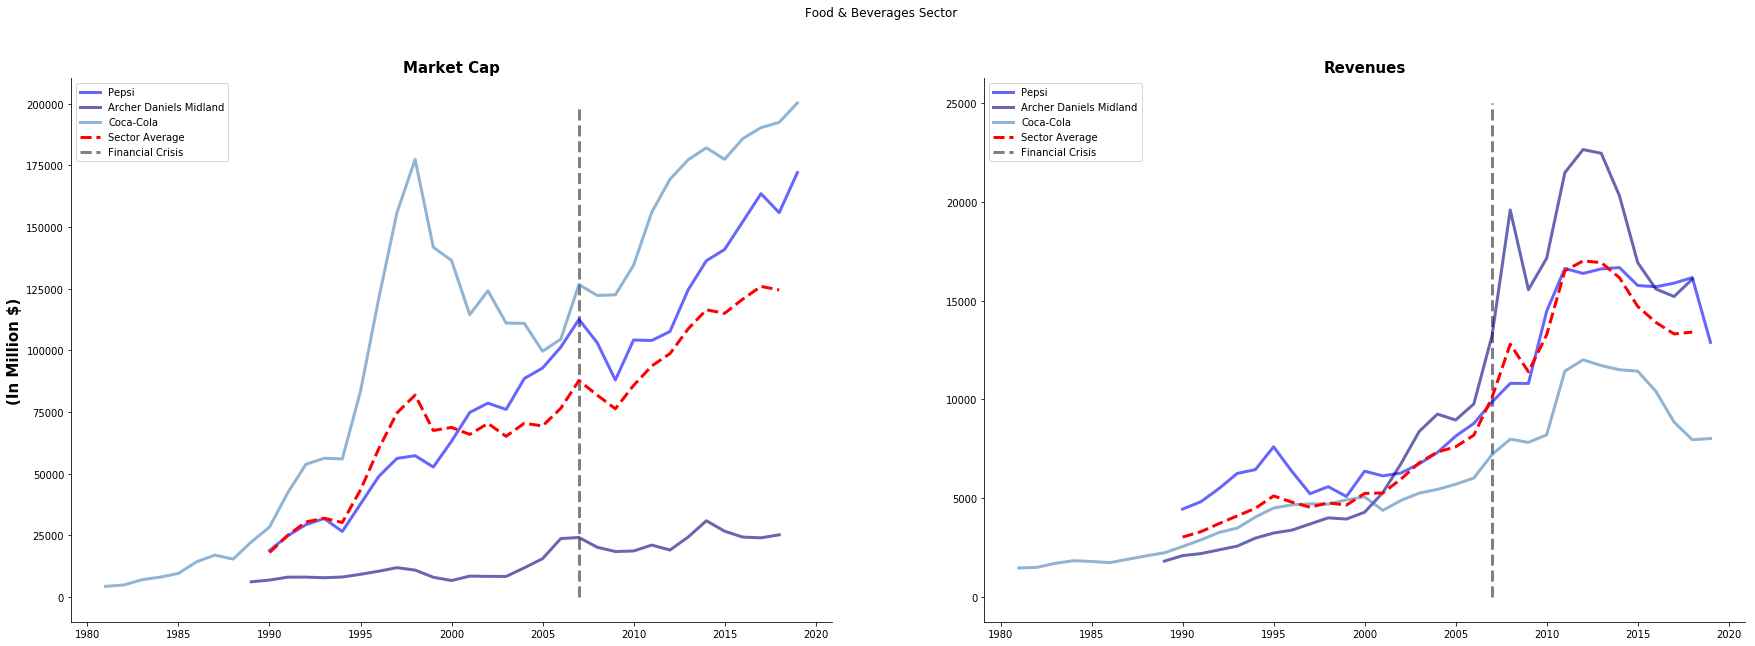

In [26]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(30,10))
ax = axes

fig.suptitle("Food & Beverages Sector", fontdict = {'fontsize':30, 'fontweight':'bold'})


########## Food & Beverages Sector Plot ###########

mrk_avg = (PEP["Market Cap"]+ADM["Market Cap"]+KO["Market Cap"])/3

ax[0].plot(PEP.Year, PEP["Market Cap"], color = "blue", alpha = 0.6, linewidth = 3, label = "Pepsi")
ax[0].plot(ADM.Year, ADM["Market Cap"], color = "navy", alpha = 0.6, linewidth = 3, label = "Archer Daniels Midland")
ax[0].plot(KO.Year, KO["Market Cap"], color = "steelblue", alpha = 0.6, linewidth = 3, label = "Coca-Cola")
ax[0].plot(KO.Year, mrk_avg, color = "red", linestyle = "--", alpha = 1, linewidth = 3, label = "Sector Average")
ax[0].ticklabel_format(useOffset=False, style='plain')

ax[0].vlines(x = 2007, ymin = 0, ymax = 200000, colors = 'gray', linestyles = 'dashed', label = "Financial Crisis", linewidth = 3)

ax[0].legend(frameon = True)

ax[0].set_title(label = "Market Cap", fontdict = {'fontsize':15, 'fontweight':'bold'})
ax[0].set_ylabel(ylabel = "(In Million $)", fontdict = {'fontsize':15, 'fontweight':'bold'})

ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)

##################################################################

rev_avg = (PEP["Revenue"]+ADM["Revenue"]+KO["Revenue"])/3

ax[1].plot(PEP.Year, PEP["Revenue"], color = "blue", alpha = 0.6, linewidth = 3, label = "Pepsi")
ax[1].plot(ADM.Year, ADM["Revenue"], color = "navy", alpha = 0.6, linewidth = 3, label = "Archer Daniels Midland")
ax[1].plot(KO.Year, KO["Revenue"], color = "steelblue", alpha = 0.6, linewidth = 3, label = "Coca-Cola")
ax[1].plot(KO.Year, rev_avg, color = "red", linestyle = "--", alpha = 1, linewidth = 3, label = "Sector Average")
ax[1].ticklabel_format(useOffset=False, style='plain')

ax[1].vlines(x = 2007, ymin = 0, ymax = 25000, colors = 'gray', linestyles = 'dashed', label = "Financial Crisis", linewidth = 3)

ax[1].legend(frameon = True)

ax[1].set_title(label = "Revenues", fontdict = {'fontsize':15, 'fontweight':'bold'})

ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)

plt.savefig("food_sector.png", bbox_inches = "tight", dip = 1200)

plt.show()

* There are two things we would spotlight on the food & beverages sector. 
* One is that Archer Daniels Midland outpaced its competitors in revenue from 2004 to 2016, but still struggled on its market cap. 
* Two is that even though Coca-Cola's revenue roams below its competitors, it's market cap is sustained above the others. 
* It may be that Coca-Cola's brand image or the number of outstanding shares is contributing to the current phenomena. 

### So far ....

So far, we have plotted the market caps and revenues of different companies by sector as well as their averages.
Now, we are going to swtich the gear and give more attention to the average market caps by sectors and plot them all in one. 
In this way, we will be able to compare how the market caps of sectors changed over time. 

Instead of using the previous dataframe to plot the market cap average, we are going to create a new dataframe. The function below takes in a name of a sector and three different companies within the sector. Then the funciton will generate a new dataframe with columns of each company's market cap and their average. 

In [27]:
def create_avg_mk(Sector, Company_1, Company_2, Company_3):

    A_MK = pd.DataFrame(groupby_df.loc[Sector].loc[Company_1]["Market Cap"])
    A_MK.rename(columns = {"Market Cap": Company_1 + " Market Cap"}, inplace = True)

    B_MK = pd.DataFrame(groupby_df.loc[Sector].loc[Company_2]["Market Cap"])
    B_MK.rename(columns = {"Market Cap": Company_2 + " Market Cap"}, inplace = True)

    C_MK = pd.DataFrame(groupby_df.loc[Sector].loc[Company_3]["Market Cap"])
    C_MK.rename(columns = {"Market Cap": Company_3 + " Market Cap"}, inplace = True)

    sector_MK = A_MK.join([B_MK, C_MK], how="inner")

    sector_MK["Average Market Cap"] = (sector_MK[Company_1 + " Market Cap"] 
                                       + sector_MK[Company_2 + " Market Cap"] + 
                                       sector_MK[Company_3 + " Market Cap"])/3
    
    sector_MK.index = pd.to_datetime(sector_MK.index, yearfirst = True)
    
    sector_MK["Average Market Cap"] = sector_MK["Average Market Cap"]/1000000
    sector_MK["Average Market Cap"] = sector_MK["Average Market Cap"].astype('int64')
    
    return sector_MK

In [28]:
energy_MK = create_avg_mk("Energy", "XOM", "CVX", "COP")
tech_MK =  create_avg_mk("Tech", "AAPL", "AMZN", "GOOGL")
motor_MK =  create_avg_mk("Motor Vehicles and Parts", "GM", "FORD", "GT")
health_MK =  create_avg_mk("Health", "CVS", "PFE", "MRK")
indus_MK =  create_avg_mk("Industrials", "GE", "HON", "MMM")
food_MK =  create_avg_mk("Food & Beverages", "PEP", "ADM", "KO")

Here is an example of a new dataframe. 

In [29]:
energy_MK

,XOM Market Cap,CVX Market Cap,COP Market Cap,Average Market Cap
Date,,,,
1989-12-31,6.445000e+10,2.317728e+10,6.142138e+09,31256
1990-03-31,5.765625e+10,2.404350e+10,6.341270e+09,29347
1990-06-30,5.976902e+10,2.494794e+10,6.281816e+09,30332
1990-09-30,6.110638e+10,2.615900e+10,6.310733e+09,31192
1990-12-31,6.449008e+10,2.565841e+10,6.407731e+09,32185
1991-03-31,7.283250e+10,2.701160e+10,7.276500e+09,35706
1991-06-30,7.235086e+10,2.468755e+10,6.597360e+09,34545
1991-09-30,7.400836e+10,2.576175e+10,6.814290e+09,35528
1991-12-31,7.581323e+10,2.413620e+10,6.232632e+09,35394


### Now, we am going to plot the average Market Cap by the sectors

### Log version of the plot

c:\users\shawnyoon\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


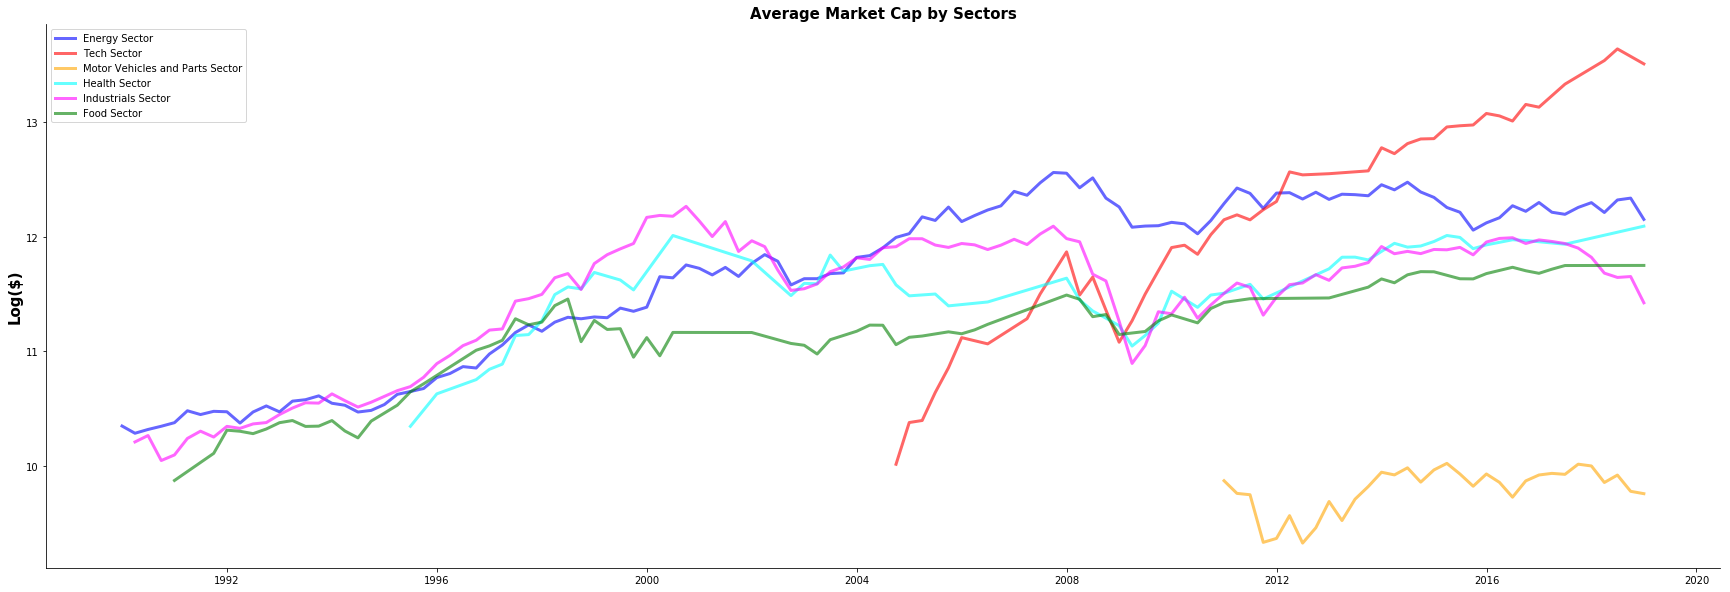

In [30]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(30,10))
ax = axes

########## Average Market Cap by the sectors Plot ###########


ax.plot(energy_MK.index, np.log(energy_MK["Average Market Cap"]), color = "blue", alpha = 0.6, linewidth = 3, label = "Energy Sector")
ax.plot(tech_MK.index, np.log(tech_MK["Average Market Cap"]), color = "red", alpha = 0.6, linewidth = 3, label = "Tech Sector")
ax.plot(motor_MK.index, np.log(motor_MK["Average Market Cap"]), color = "orange", alpha = 0.6, linewidth = 3, label = "Motor Vehicles and Parts Sector")
ax.plot(health_MK.index, np.log(health_MK["Average Market Cap"]), color = "cyan", alpha = 0.6, linewidth = 3, label = "Health Sector")
ax.plot(indus_MK.index, np.log(indus_MK["Average Market Cap"]), color = "magenta", alpha = 0.6, linewidth = 3, label = "Industrials Sector")
ax.plot(food_MK.index, np.log(food_MK["Average Market Cap"]), color = "green", alpha = 0.6, linewidth = 3, label = "Food Sector")
#ax.ticklabel_format(useOffset=False, style='plain')

ax.legend(frameon = True)

ax.set_title(label = "Average Market Cap by Sectors", fontdict = {'fontsize':15, 'fontweight':'bold'})
ax.set_ylabel(ylabel = "Log($)", fontdict = {'fontsize':15, 'fontweight':'bold'})

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("avg_mk_log.png", bbox_inches = "tight", dip = 1200)

plt.show()

### Normal version of the plot

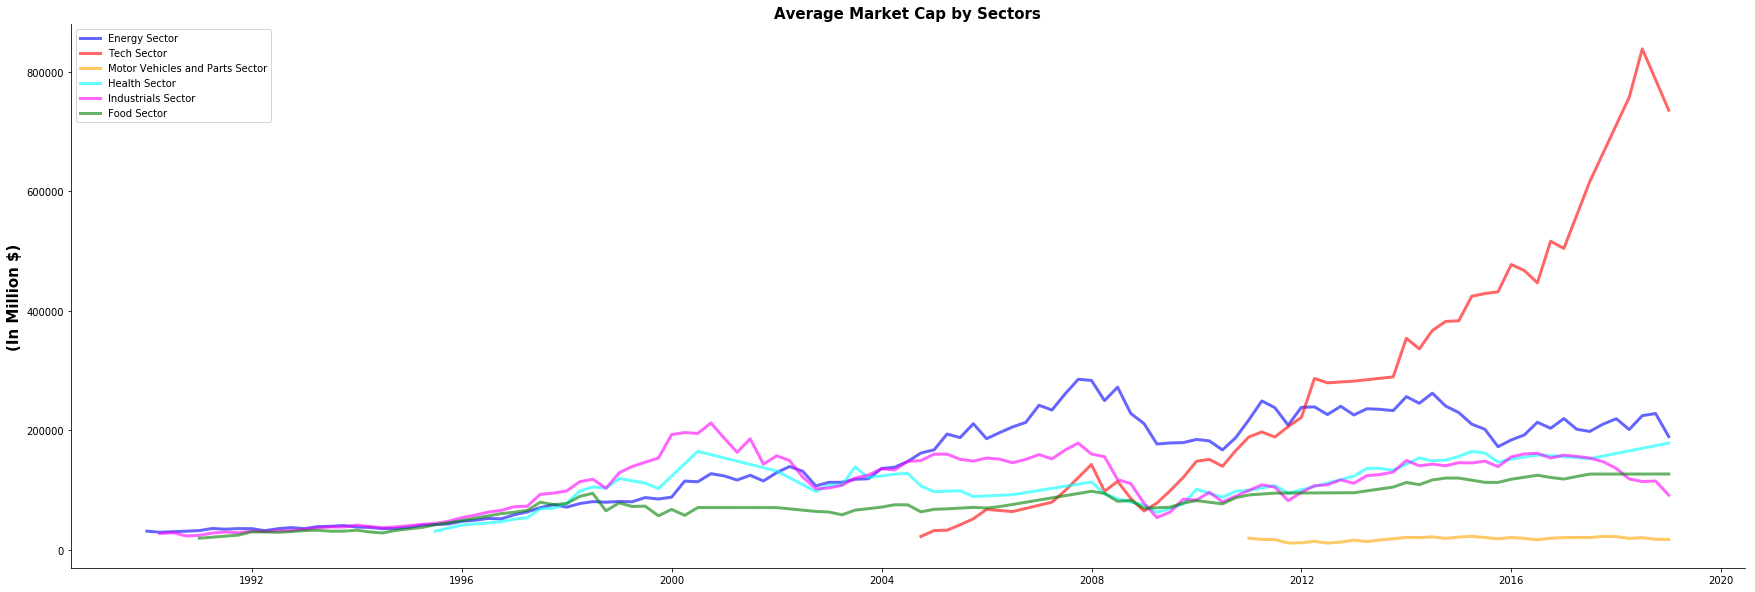

In [31]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(30,10))
ax = axes

########## Average Market Cap by the sectors Plot ###########


ax.plot(energy_MK.index, energy_MK["Average Market Cap"], color = "blue", alpha = 0.6, linewidth = 3, label = "Energy Sector")
ax.plot(tech_MK.index, tech_MK["Average Market Cap"], color = "red", alpha = 0.6, linewidth = 3, label = "Tech Sector")
ax.plot(motor_MK.index, motor_MK["Average Market Cap"], color = "orange", alpha = 0.6, linewidth = 3, label = "Motor Vehicles and Parts Sector")
ax.plot(health_MK.index, health_MK["Average Market Cap"], color = "cyan", alpha = 0.6, linewidth = 3, label = "Health Sector")
ax.plot(indus_MK.index, indus_MK["Average Market Cap"], color = "magenta", alpha = 0.6, linewidth = 3, label = "Industrials Sector")
ax.plot(food_MK.index, food_MK["Average Market Cap"], color = "green", alpha = 0.6, linewidth = 3, label = "Food Sector")
#ax.ticklabel_format(useOffset=False, style='plain')

ax.legend(frameon = True)

ax.set_title(label = "Average Market Cap by Sectors", fontdict = {'fontsize':15, 'fontweight':'bold'})
ax.set_ylabel(ylabel = "(In Million $)", fontdict = {'fontsize':15, 'fontweight':'bold'})

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("avg_mk.png", bbox_inches = "tight", dip = 1200)

plt.show()

### Energy Sector Correlation Plot

This is just some extra plots that shows correlation between ExxonMobil's market cap and revenue. 
It looks like the relationship between the market cap and the revenue is highly correlated. 

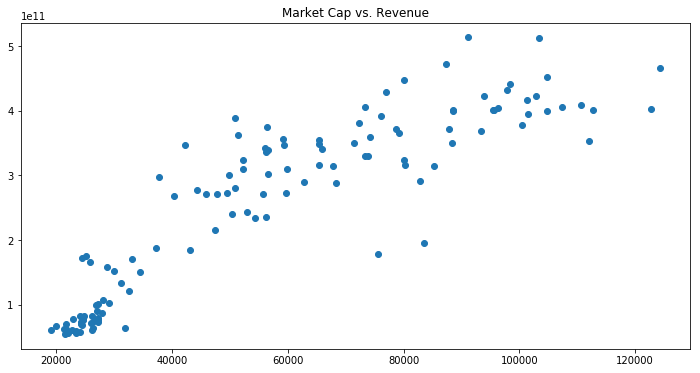

In [32]:
XOM_rev = groupby_df.loc["Energy"].loc["XOM"]["Revenue"]
XOM_mrk = groupby_df.loc["Energy"].loc["XOM"]["Market Cap"]

fig, ax = plt.subplots(figsize = (12,6))

ax.scatter(XOM_rev, XOM_mrk)

ax.set_title("Market Cap vs. Revenue")


plt.show()

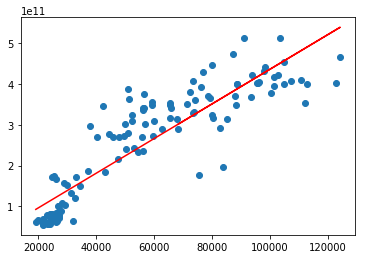

In [33]:
XOM_rev = groupby_df.loc["Energy"].loc["XOM"]["Revenue"]
XOM_mrk = groupby_df.loc["Energy"].loc["XOM"]["Market Cap"]

from sklearn.linear_model import LinearRegression

X = XOM_rev.values.reshape(-1, 1)  # values converts it into a numpy array
Y = XOM_mrk.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()